In [51]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Рейтинг продаж видеоигр

Допустим вы являетесь владельцем игровой студии и перед вами встает вопрос в каком жанре разрабатывать игру. В параметрах вы можете указать свой примерный бюджет, желаемую прибыль, регион на который вы ориентируетесь, год выпуска и так далее. Модель подберет вам оптимальный жанр игры.

## 1. Загружаем данные

In [52]:
url = "https://raw.githubusercontent.com/Vodeneev/ML_Magistracy/main/vgsales.csv"
data_raw = pd.read_csv(url)

In [53]:
data_raw.shape

(16598, 11)

### Первые 5 строк датасета

In [54]:
data_raw.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Последние 5 строк датасета

In [55]:
data_raw.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


Столбцы признаки имеют имена 
- Rank - место по продажам
- Platform  - платформа на которой выпущена игра
- Publisher - создатель игры

А также топы по продажам в регионах, год выпуска и жанр

In [56]:
data_raw.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [57]:
data_raw.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### Отбор числовых колонок

In [58]:
data_raw_numeric = data_raw.select_dtypes(include=[np.number])
numeric_cols = data_raw_numeric.values
print(numeric_cols)

[[1.0000e+00 2.0060e+03 4.1490e+01 ... 3.7700e+00 8.4600e+00 8.2740e+01]
 [2.0000e+00 1.9850e+03 2.9080e+01 ... 6.8100e+00 7.7000e-01 4.0240e+01]
 [3.0000e+00 2.0080e+03 1.5850e+01 ... 3.7900e+00 3.3100e+00 3.5820e+01]
 ...
 [1.6598e+04 2.0080e+03 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e-02]
 [1.6599e+04 2.0100e+03 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e-02]
 [1.6600e+04 2.0030e+03 1.0000e-02 ... 0.0000e+00 0.0000e+00 1.0000e-02]]


In [59]:
data_raw_numeric

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...
16593,16596,2002.0,0.01,0.00,0.00,0.00,0.01
16594,16597,2003.0,0.01,0.00,0.00,0.00,0.01
16595,16598,2008.0,0.00,0.00,0.00,0.00,0.01
16596,16599,2010.0,0.00,0.01,0.00,0.00,0.01


### Отбор нечисловых колонок

In [60]:
data_raw_non_numeric = data_raw.select_dtypes(exclude=[np.number])
non_numeric_cols = data_raw_non_numeric.columns.values
print(non_numeric_cols)

['Name' 'Platform' 'Genre' 'Publisher']


In [61]:
data_raw_non_numeric

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo
...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco
16594,Men in Black II: Alien Escape,GC,Shooter,Infogrames
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision
16596,Know How 2,DS,Puzzle,7G//AMES


## Отсутствующие данные

In [62]:
for col in data_raw.columns:
    pct_missing = np.mean(data_raw[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Rank - 0%
Name - 0%
Platform - 0%
Year - 2%
Genre - 0%
Publisher - 0%
NA_Sales - 0%
EU_Sales - 0%
JP_Sales - 0%
Other_Sales - 0%
Global_Sales - 0%


Заполним пропуски в признаках их медианным значением

In [63]:
df_numeric = data_raw.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = data_raw[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        med = data_raw[col].median()
        data_raw[col] = data_raw[col].fillna(med)

imputing missing values for: Year


Теперь в нашем датасете не осталось пропусков

In [64]:
for col in data_raw.columns:
    pct_missing = np.mean(data_raw[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Rank - 0%
Name - 0%
Platform - 0%
Year - 0%
Genre - 0%
Publisher - 0%
NA_Sales - 0%
EU_Sales - 0%
JP_Sales - 0%
Other_Sales - 0%
Global_Sales - 0%


## Визуализация данных

Ниже представлены некоторые метрические характеристики числовых признаков:

    count - число значений
    mean - среднее арифметическое
    std - разброс
    min - минимальное значение
    max - максимальное значение



In [65]:
data = data_raw
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.416134,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.781686,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Можно вычислить матрицу корреляции, чтобы выявить возможные связи признаков между собой

In [66]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [67]:
corr_mat = data.corr()
corr_mat

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.177526,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.177526,1.000000,-0.091282,0.005824,-0.169432,0.040857,-0.074807
NA_Sales,-0.401362,-0.091282,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.005824,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169432,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.040857,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074807,0.941047,0.902836,0.611816,0.748331,1.000000


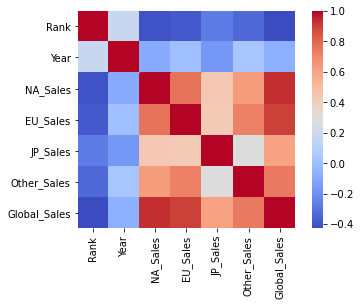

In [68]:
sns.heatmap(corr_mat, square=True, cmap="coolwarm")
pass

Уберем сильно коррелирующие признаки

In [69]:
drop_col = corr_mat.where(np.triu(corr_mat > 0.9, k=1)).stack()

In [70]:
drop_col

NA_Sales  Global_Sales    0.941047
EU_Sales  Global_Sales    0.902836
dtype: float64

In [71]:
data = data.drop(["NA_Sales"], 1)
data = data.drop(["EU_Sales"], 1)

In [72]:
data

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.00,0.01


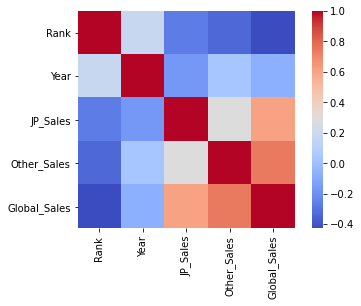

In [73]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, cmap="coolwarm")
pass

Убрали 2 столбца наиболее сильно коррелирующих со столбцом "Мировых продаж". Этими столбцами ожидаемо оказались "Продажи в Европе" и "Продажи в Северной Америке"

## Обработка категориальных признаков

Название игры - категориальный признак, но является ли он таким уж полезным для нас?
Да, определенно, яркое и запоминающееся название игры может повысить продажи и популярность игры, но в нашем случае оно скорее будет запутывать модель большим количеством признаков.

In [74]:
data = data.drop(["Name"], 1)

Что касается "Издателя" то его я хочу убрать для удобства интерфейса нашей модели. 
По моей задумке пользователь вводит ожидаемый доход, игровую платформу и год создания игры. Модель же ему должна подсказать жанр. Издатель тут просто неуместен, потому что это мы)

In [75]:
data = data.drop(["Publisher"],1)

Преобразуем категориальный признак "Жанр" к числовому значению

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.Genre)
data['Genre'] = le.transform(data.Genre)
data['Genre']

0        10
1         4
2         6
3        10
4         7
         ..
16593     4
16594     8
16595     6
16596     5
16597     4
Name: Genre, Length: 16598, dtype: int32

### Бинаризация номинальных признаков

In [77]:
data = pd.get_dummies(data)
data

,Rank,Year,Genre,JP_Sales,Other_Sales,Global_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,1,2006.0,10,3.77,8.46,82.74,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1985.0,4,6.81,0.77,40.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2008.0,6,3.79,3.31,35.82,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,2009.0,10,3.28,2.96,33.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,1996.0,7,10.22,1.00,31.37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,2002.0,4,0.00,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16594,16597,2003.0,8,0.00,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16595,16598,2008.0,6,0.00,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16596,16599,2010.0,5,0.00,0.00,0.01,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Нормализация количественных признаков

In [78]:
numCols   = [i for i in data.columns if (data[i].dtype.name == 'float64')]
numCols

['Year', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [79]:
data_norm = (data[numCols] - data[numCols].mean(axis = 0))/data[numCols].std(axis = 0)
data_norm

,Year,JP_Sales,Other_Sales,Global_Sales
0,-0.071975,11.937698,44.604742,52.862433
1,-3.704133,21.766640,3.828109,25.531734
2,0.273945,12.002362,17.296594,22.689341
3,0.446905,10.353428,15.440700,20.875869
4,-1.801574,32.791869,5.047696,19.827656
...,...,...,...,...
16593,-0.763814,-0.251484,-0.254857,-0.339184
16594,-0.590854,-0.251484,-0.254857,-0.339184
16595,0.273945,-0.251484,-0.254857,-0.339184
16596,0.619865,-0.251484,-0.254857,-0.339184


In [80]:
data = pd.concat((data_norm, data.drop(['Year',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales'], axis=1)), axis=1)
data

,Year,JP_Sales,Other_Sales,Global_Sales,Rank,Genre,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,-0.071975,11.937698,44.604742,52.862433,1,10,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-3.704133,21.766640,3.828109,25.531734,2,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.273945,12.002362,17.296594,22.689341,3,6,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.446905,10.353428,15.440700,20.875869,4,10,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.801574,32.791869,5.047696,19.827656,5,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,-0.763814,-0.251484,-0.254857,-0.339184,16596,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16594,-0.590854,-0.251484,-0.254857,-0.339184,16597,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16595,0.273945,-0.251484,-0.254857,-0.339184,16598,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16596,0.619865,-0.251484,-0.254857,-0.339184,16599,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Доводим датасет до "ума". И убираем продажи в Японии и в остальном мире, так как это достаточно специфические рынки, а я хочу получить достаточно простую, общую модель

In [81]:
data = data.drop(["JP_Sales"],1)
data = data.drop(["Other_Sales"],1)

# Классификация

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

В качестве обучающей выборки возьмем 75% данных, остальные 25% включим в тестовую.

In [83]:
X = data.drop(["Genre"], 1)
y = data["Genre"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train

12902     4
12509     6
9002     10
10023     7
9697      5
         ..
11284    10
11964     0
5390      0
860       4
15795     9
Name: Genre, Length: 12448, dtype: int32

## K ближайших соседей

In [84]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_pred)
print(err_train, err_test)

0.625 0.8436144578313253


In [85]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_pred)
print(err_train, err_test)

0.625 0.8436144578313253


In [86]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_pred)
print(err_train, err_test)

0.7040488431876607 0.8378313253012049


Попробуем уменьшить процент ошибок, анализируя Conflusion matrix

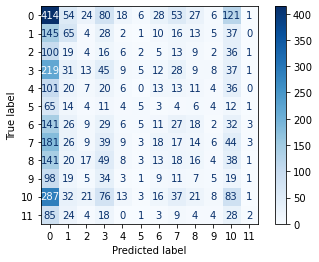

In [87]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model, X_test, y_test, cmap=plt.cm.Blues)

In [88]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Action': 0, 'Adventure': 1, 'Fighting': 2, 'Misc': 3, 'Platform': 4, 'Puzzle': 5, 'Racing': 6, 'Role-Playing': 7, 'Shooter': 8, 'Simulation': 9, 'Sports': 10, 'Strategy': 11}


In [89]:
data_c = data[data["Genre"].isin([1,2,3,4,5,6,7,8,9,11])]

In [90]:
X = data_c.drop(["Genre"], 1)
y = data_c["Genre"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_pred)
print(err_train, err_test)

0.6196049743964887 0.866861741038771


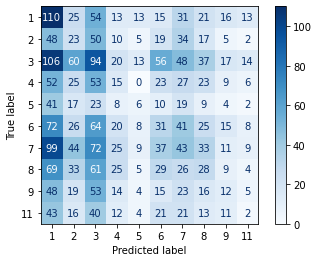

In [91]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model, X_test, y_test, cmap=plt.cm.Blues)

Не помогло :(

## Промежуточный вывод: процент ошибки очень большой или модель К ближайших соседей к этим данным не очень подходит

## Перейдем к нейронным сетям

### Обучаем классификатор

In [92]:
from sklearn.neural_network import MLPClassifier

In [93]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [94]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 11.4 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', random_state=42, solver='lbfgs')

### Проверим качество классификатора

In [95]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

#### Ошибки на обучающей и тестовой выборке

In [96]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.8427212874908558 0.8280907095830286


### Подбор гиперпараметров

In [97]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (3,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

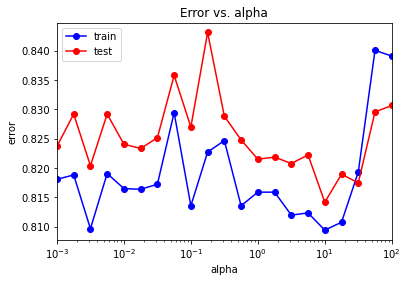

In [98]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [109]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (20,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

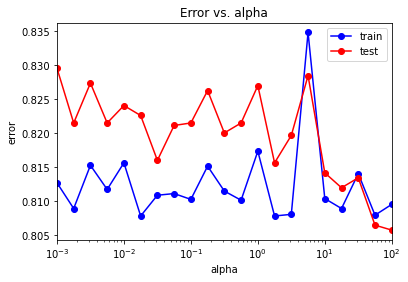

In [110]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [111]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (60,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

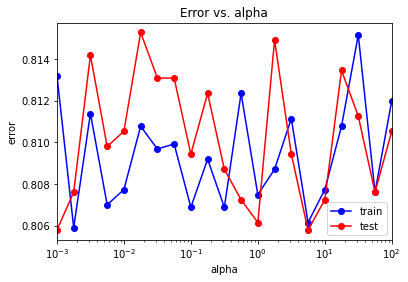

In [112]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

#### Рассмотрим как у нас менялась метрика в зависимости от гиперпараметра:

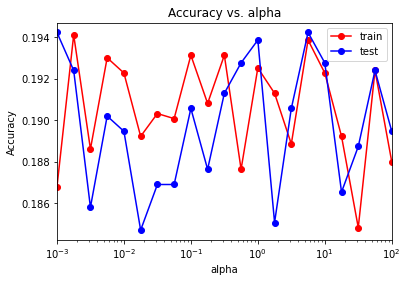

In [113]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [114]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.805900999756157 0.8057790782735919


Оптимальное значение alpha:

In [115]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[1.00000000e-03 5.62341325e+00]


In [116]:
alpha_opt = alpha_opt[0]

### Классификатор при найденном оптимальном значении alpha:

In [117]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.8415020726652036
0.8273591806876371


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Матрица рассогласования:

In [118]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[  0   0   0   1   1   0   1   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [309 208 454 217 135 302 371 271 206 183]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  2   5  11  15   3   8  10  18   2   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


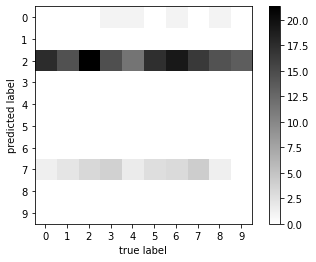

In [119]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

## Другие метрики качества:

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       311
           2       0.00      0.00      0.00       213
           3       0.17      0.98      0.29       465
           4       0.00      0.00      0.00       233
           5       0.00      0.00      0.00       139
           6       0.00      0.00      0.00       310
           7       0.00      0.00      0.00       382
           8       0.24      0.06      0.10       289
           9       0.00      0.00      0.00       209
          11       0.00      0.00      0.00       183

    accuracy                           0.17      2734
   macro avg       0.04      0.10      0.04      2734
weighted avg       0.05      0.17      0.06      2734



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Выводы:

Данная задача не классифицируется корректно с текущим набором параметров и с выбранными классами классификации. И это хорошо! Игры по шаблону не сделаешь, тут все индивидуально